In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import time
import h5py

In [2]:
def load_dataset(): 
    train_dataset = h5py.File('train_catvnoncat.h5', 'r')
    train_set_x = np.array(train_dataset["train_set_x"])
    train_set_y = np.array(train_dataset["train_set_y"])
    train_set_classes = np.array(train_dataset["list_classes"])
    return train_set_x, train_set_y, train_set_classes
X, y, classes = load_dataset()
m_train= len(y)
# Flatten the matrix into a (64*64*3, m) matrix
X_flatten = X.reshape(64*64*3, m_train)
# Get the number of features 
num_features = X_flatten.shape[0]

# Fix the shape of y
y = y.reshape(1, m_train)

# Standardize the data
X_flatten = X_flatten/255
print(X_flatten.shape)
print(y.shape)

(12288, 209)
(1, 209)


In [3]:
def sigmoid(z):
    # Returns the sigmoid of the input 
    return 1/(1 + np.exp(-z))

In [4]:
def propagate(X, y, parameters): 
    epsilon = 1e-5
    m = X.shape[1]
    # Compute results of first layer
    predictions = sigmoid(np.dot(parameters['w1'].transpose(), X) + parameters['b1'])
    # Get the errors in the prediction
    error = -(y * np.log(predictions + epsilon) +  (1-y) * np.log(1-predictions+epsilon))
    # Compute the cost of the prediction
    cost = 1/m * np.sum(error, axis=1)
    # Calculate the gradient
    grad_w = 1/m * np.dot(X, (predictions-y).transpose())
    grad_b = 1/m * np.sum(predictions-y, axis=1)
    grad = {
        'dw': grad_w,
        'db': grad_b
    }
    return  cost[0], grad
    

In [5]:
def optimize(X, y, parameters, num_iters, alpha, printCost):
    J_hist = []
    for i in range(num_iters): 
        cost, grad = propagate(X, y, parameters)
        parameters['w1'] = parameters['w1'] - (alpha * grad['dw'])
        parameters['b1'] = parameters['b1'] - (alpha * grad['db'])
        if i%100 == 0: 
            J_hist.append(cost)
            if printCost:
                print(f'Cost at iteration {i}: {cost}')
            
    return parameters, J_hist

In [6]:
def model (X, y, num_iters, alpha, printCost, plotCost = False): 
    # Start sanity check 
    tic = time.time()
    # Initialize parameters
    w1 = np.zeros((X.shape[0], 1))
    b1 = 0
    parameters = {
        'w1': w1, 
        'b1': b1
    }
    parameters, J_hist = optimize(X, y, parameters, num_iters, alpha, printCost)
    # End sanity check 
    toc = time.time()
    print('Final Cost is:', J_hist[-1])
    print('Time taken to train is: ' + str(toc-tic) + 's')
    
    d = {
        "cost": J_hist, 
        "parameters": parameters, 
        "learning_rate": alpha
    }
    
    if plotCost is True: 
        plt.plot(J_hist)
        plt.xlabel('Iterations (Per hundred)')
        plt.ylabel('$ J(\Theta)$')
        plt.show()
    
    return d

Final Cost is: 0.3326495918418919
Time taken to train is: 67.01410865783691s


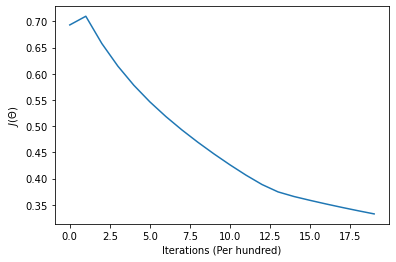

Final cost is: 0.3326495918418919


In [7]:
d = model(X_flatten, y, 2000, 0.005, False, True)
print('Final cost is:', d["cost"][-1])


-------------------------------------------------------

Final Cost is: 1.7044805127374603
Time taken to train is: 70.73949480056763s

-------------------------------------------------------


-------------------------------------------------------

Final Cost is: 0.3326495918418919
Time taken to train is: 70.99969935417175s

-------------------------------------------------------


-------------------------------------------------------

Final Cost is: 0.48603365709801327
Time taken to train is: 66.8025279045105s

-------------------------------------------------------


-------------------------------------------------------

Final Cost is: 0.5912931946464092
Time taken to train is: 107.99647212028503s

-------------------------------------------------------



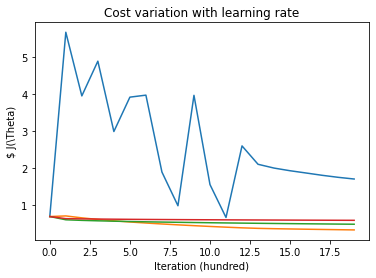

In [9]:
# Show variation between different learning rates
learning_rates = [0.05, 0.005, 0.001, 0.0001]
costs = {}
for i, v in enumerate(learning_rates): 
    print('\n' + "-------------------------------------------------------" + '\n')
    d = model(X_flatten, y, 2000, v, False, False)
    costs[i] = d
    print('\n' + "-------------------------------------------------------" + '\n')    
for i in range(len(learning_rates)): 
    plt.plot(costs[i]["cost"], label = costs[i]["learning_rate"])
plt.xlabel('Iteration (hundred)')
plt.ylabel('$ J(\Theta)')
plt.title('Cost variation with learning rate')
plt.show()